## **Data Extraction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/ML Datasets/DataSkool/Data Challenge - Dataset.xlsx')

In [ ]:
data.head()

,Course Id,Course-Title,Is Paid,Level,Published Date,Pulished Timestamp,Subject,URL1,CONTENT DURATION in HR's,Num Lectures,Price,Reviews,Students
0,1070968,Ultimate Investment Banking Course,Paid,All Levels,18/01/17,30/12/1899 12:58:58 pm,Business Finance,https://www.udemy.com/ultimate-investment-bank...,0.045139,51,200,23,2147
1,1113822,Complete GST Course & Certification - Grow You...,Paid,All Levels,2017-09-03 00:00:00,30/12/1899 8:34:20 am,Business Finance,https://www.udemy.com/goods-and-services-tax/,39.000000,274,75,923,2792
2,1006314,Financial Modeling for Business Analysts and C...,Paid,Intermediate Level,19/12/16,30/12/1899 11:26:30 am,Business Finance,https://www.udemy.com/financial-modeling-for-b...,2.500000,51,45,74,2174
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,Paid,All Levels,30/05/17,30/12/1899 1:07:24 am,Business Finance,https://www.udemy.com/complete-excel-finance-c...,3.000000,36,95,11,2451
4,1011058,How To Maximize Your Profits Trading Options,Paid,Intermediate Level,13/12/16,30/12/1899 6:57:18 am,Business Finance,https://www.udemy.com/how-to-maximize-your-pro...,2.000000,26,200,45,1276


In [ ]:
#Global Tools

palette = ['#4e92da', '#fdbd49', '#33b7a0', '#031049', '#29bba6']
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Transformation**

### **Exploring and Understanding The data**

In [ ]:
data.shape

(3673, 13)

In [ ]:
data.columns

Index(['Course Id', 'Course-Title', 'Is Paid', 'Level', 'Published Date',
       'Pulished Timestamp', 'Subject', 'URL1', 'CONTENT DURATION in HR's',
       'Num Lectures', 'Price', 'Reviews', 'Students'],
      dtype='object')

In [ ]:
data.describe()

,Course Id,CONTENT DURATION in HR's,Num Lectures,Price,Reviews,Students
count,3.673000e+03,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000
mean,6.764315e+05,4.116966,40.104547,66.049551,156.438606,3198.631092
std,3.430167e+05,6.046393,50.411336,61.027934,936.075682,9510.115507
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.081180e+05,1.130000,15.000000,20.000000,4.000000,110.000000
50%,6.882440e+05,2.000000,25.000000,45.000000,18.000000,912.000000
75%,9.615080e+05,4.500000,45.000000,95.000000,67.000000,2543.000000
max,1.282064e+06,78.500000,779.000000,200.000000,27445.000000,268923.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Course Id                 3673 non-null   int64  
 1   Course-Title              3673 non-null   object 
 2   Is Paid                   3673 non-null   object 
 3   Level                     3673 non-null   object 
 4   Published Date            3673 non-null   object 
 5   Pulished Timestamp        3673 non-null   object 
 6   Subject                   3673 non-null   object 
 7   URL1                      3673 non-null   object 
 8   CONTENT DURATION in HR's  3673 non-null   float64
 9   Num Lectures              3673 non-null   int64  
 10  Price                     3673 non-null   int64  
 11  Reviews                   3673 non-null   int64  
 12  Students                  3673 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 373.2+ KB


No Missing values to handel

###**Categrorical Dtat Distribution**

In [ ]:
data.describe(include=['object', 'category'])

,Course-Title,Is Paid,Level,Published Date,Pulished Timestamp,Subject,URL1
count,3673,3673,3673,3673,3673,3673,3673
unique,3658,2,4,1192,3513,4,3667
top,Acoustic Blues Guitar Lessons,Paid,All Levels,2017-01-05 00:00:00,30/12/1899 10:36:30 am,Web Development,https://www.udemy.com/cfa-level-2-quantitative...
freq,3,3364,1924,24,3,1200,2


* There are 15 duplicated course data (3673-3658).

* There are **4 Course Difficulties** and **'All Levels'** Complexity level is the most common.

* The most courses is **paid** (3365 of 3673)
* The most common Feild is **Web Development** from the main 4 feilds/ subjects which is **covered 1200** course from 3673.

In [ ]:
print("Subjects Distribution\n\n")

print(f"Number Of Distinct Subjects: {data['Subject'].nunique()}\n{'-'*30}\n")
print(f"Distinct Subjects: \n {data['Subject'].unique()}\n{'-'*30}\n")

subject_counts = data['Subject'].value_counts()
print(f"Each Subjects Count: \n  {subject_counts}\n{'-'*30}\n")
print(f"Subjects persentage to the total assigned courses: \n {data['Subject'].value_counts(normalize=True)*100}")


Subjects Distribution


Number Of Distinct Subjects: 4
------------------------------

Distinct Subjects: 
 ['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']
------------------------------

Each Subjects Count: 
  Subject
Web Development        1200
Business Finance       1194
Musical Instruments     676
Graphic Design          603
Name: count, dtype: int64
------------------------------

Subjects persentage to the total assigned courses: 
 Subject
Web Development        32.670841
Business Finance       32.507487
Musical Instruments    18.404574
Graphic Design         16.417098
Name: proportion, dtype: float64


/tmp/ipython-input-3584216249.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_counts.index, y=subject_counts.values,
/tmp/ipython-input-3584216249.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=subject_counts.index, y=subject_counts.values,


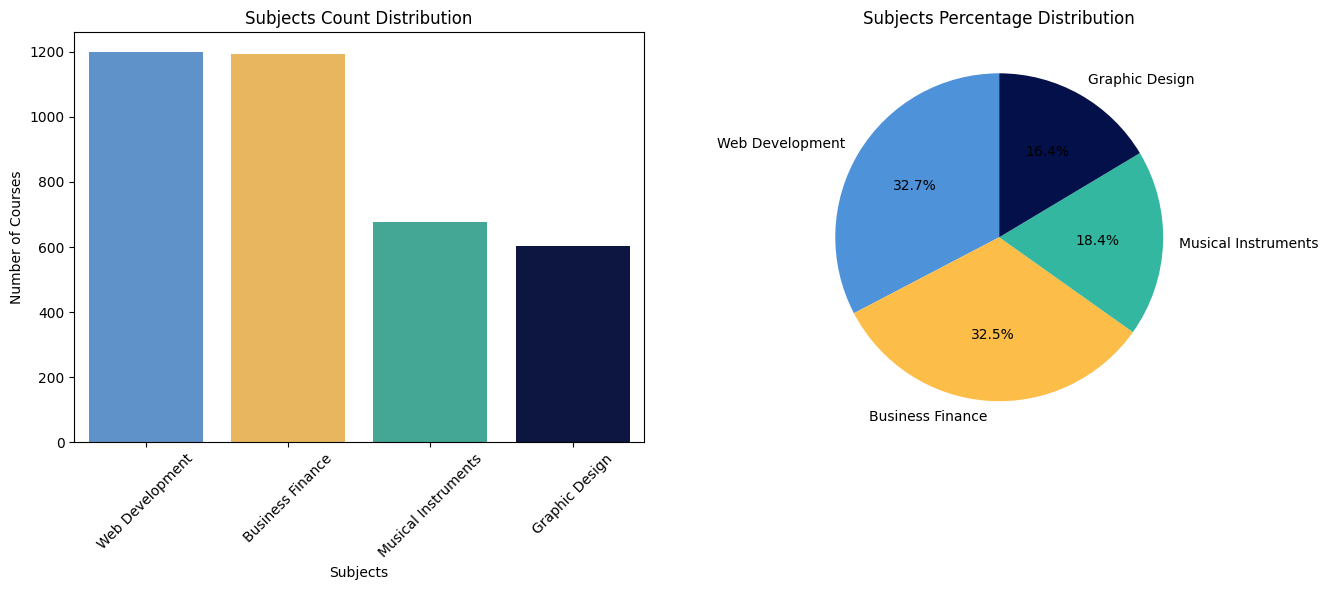

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(x=subject_counts.index, y=subject_counts.values,
            palette=palette, ax=axes[0])
axes[0].set_title("Subjects Count Distribution")
axes[0].set_xlabel("Subjects")
axes[0].set_ylabel("Number of Courses")
axes[0].tick_params(axis='x', rotation=45)

axes[1].pie(subject_counts.values, labels=subject_counts.index,
            autopct='%1.1f%%', startangle=90, colors=palette)
axes[1].set_title("Subjects Percentage Distribution")

plt.tight_layout()
plt.show()

In [ ]:
print("Levels Distribution\n\n")

print(f"Number Of Distinct Levels: {data['Level'].nunique()}\n{'-'*30}\n")
print(f"Distinct Levels: \n {data['Level'].unique()}\n{'-'*30}\n")

level_counts = data['Level'].value_counts()
print(f"Each Level Count: \n  {level_counts}\n{'-'*30}\n")
print(f"Levels percentage to the total assigned courses: \n {data['Level'].value_counts(normalize=True)*100}")


Levels Distribution


Number Of Distinct Levels: 4
------------------------------

Distinct Levels: 
 ['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']
------------------------------

Each Level Count: 
  Level
All Levels            1924
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64
------------------------------

Levels percentage to the total assigned courses: 
 Level
All Levels            52.382249
Beginner Level        34.576640
Intermediate Level    11.462020
Expert Level           1.579091
Name: proportion, dtype: float64


/tmp/ipython-input-2079283852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=level_counts.index, y=subject_counts.values,
/tmp/ipython-input-2079283852.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=level_counts.index, y=subject_counts.values,


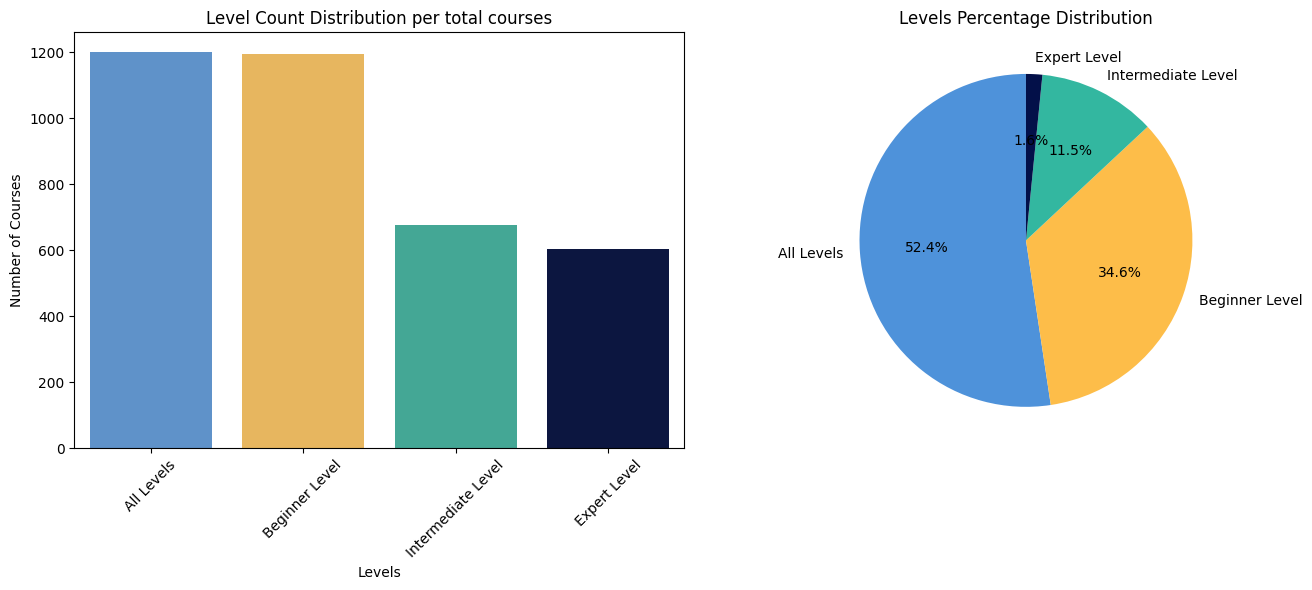

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(x=level_counts.index, y=subject_counts.values,
            palette=palette, ax=axes[0])
axes[0].set_title("Level Count Distribution per total courses")
axes[0].set_xlabel("Levels")
axes[0].set_ylabel("Number of Courses")
axes[0].tick_params(axis='x', rotation=45)


axes[1].pie(level_counts.values, labels=level_counts.index,
            autopct='%1.1f%%', startangle=90, colors=palette)
axes[1].set_title("Levels Percentage Distribution")

plt.tight_layout()
plt.show()

In [ ]:
print("payment Courses VS Free\n\n")

print(f"Paid to unpaied: {data['Is Paid'].unique()}\n{'-'*30}\n")

payment_counts = data['Is Paid'].value_counts()
print(f"count of each: \n  {payment_counts}\n{'-'*30}\n")
print(f"Levels percentage to the total assigned courses: \n {data['Is Paid'].value_counts(normalize=True)*100}")


payment Courses VS Free


Paid to unpaied: ['Paid' 'Free']
------------------------------

count of each: 
  Is Paid
Paid    3364
Free     309
Name: count, dtype: int64
------------------------------

Levels percentage to the total assigned courses: 
 Is Paid
Paid    91.587258
Free     8.412742
Name: proportion, dtype: float64


/tmp/ipython-input-3750485010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values,
/tmp/ipython-input-3750485010.py:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x=payment_counts.index, y=payment_counts.values,


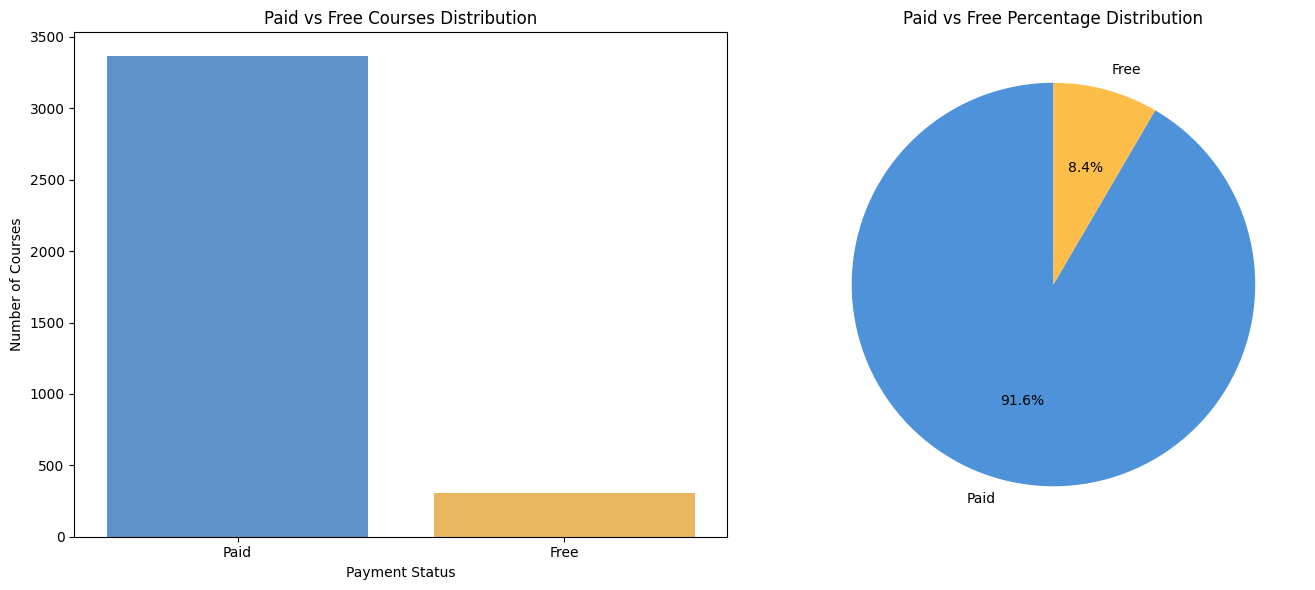

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Barplot
sns.barplot(x=payment_counts.index, y=payment_counts.values,
            palette=palette, ax=axes[0])
axes[0].set_title("Paid vs Free Courses Distribution")
axes[0].set_xlabel("Payment Status")
axes[0].set_ylabel("Number of Courses")
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
axes[1].pie(payment_counts.values, labels=payment_counts.index,
            autopct='%1.1f%%', startangle=90, colors=palette)
axes[1].set_title("Paid vs Free Percentage Distribution")

plt.tight_layout()
plt.show()

**Numerical Columns Districbution**

In [ ]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

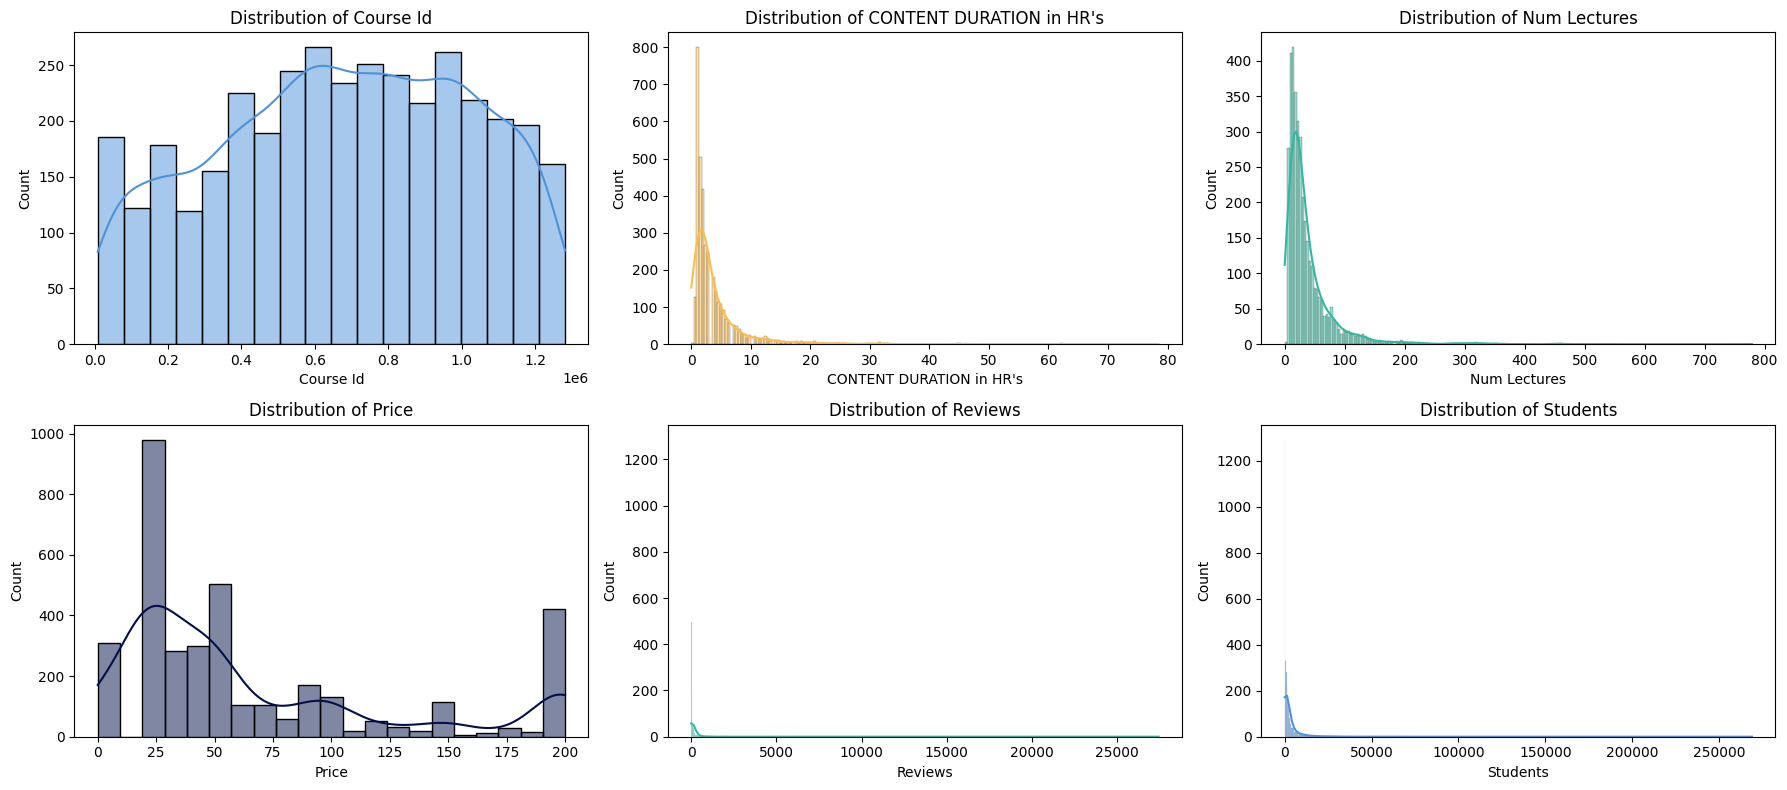

In [ ]:
cols_per_row = 3
num_rows = (len(num_cols) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(18, num_rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data[col], kde=True, ax=axes[i], color=palette[i % len(palette)])
    axes[i].set_title(f'Distribution of {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Time Ditribution**

In [ ]:
data['Published Date'] = pd.to_datetime(data['Published Date'])
data['Year'] = data['Published Date'].dt.year
print(data['Year'].value_counts().sort_index())

Year
2011       5
2012      45
2013     201
2014     495
2015    1007
2016    1205
2017     715
Name: count, dtype: int64


/tmp/ipython-input-3535136014.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Published Date'] = pd.to_datetime(data['Published Date'])


In [ ]:
time_data = pd.DataFrame()

In [ ]:
time_data['Year'] = data['Published Date'].dt.year
time_data['Month'] = data['Published Date'].dt.month
time_data['Month_Year'] = data['Published Date'].dt.to_period('M')


/tmp/ipython-input-1289354250.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette=palette)
/tmp/ipython-input-1289354250.py:7: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=year_counts.index, y=year_counts.values, palette=palette)


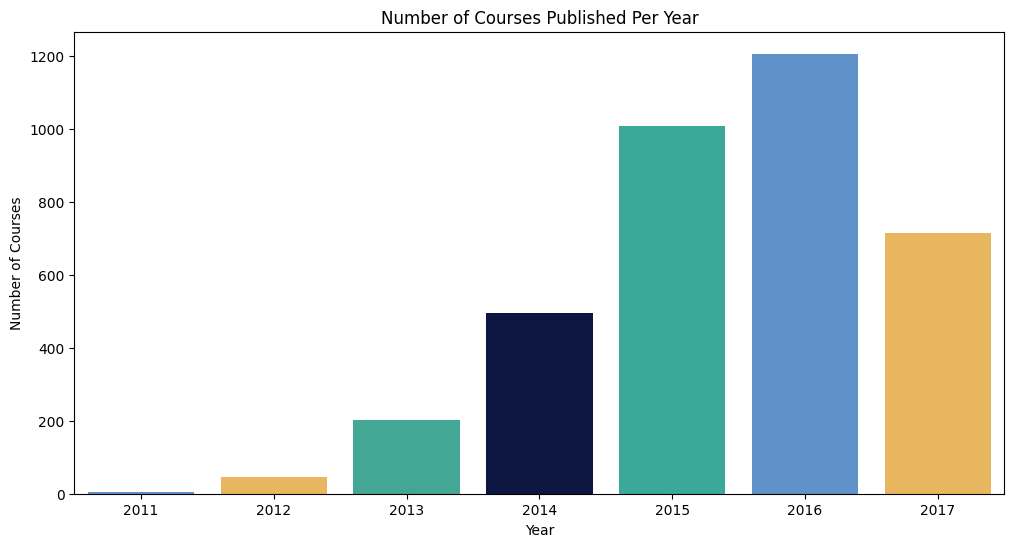

In [ ]:
year_counts = time_data['Year'].value_counts().sort_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette=palette)
plt.title("Number of Courses Published Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Courses")
plt.show()


/tmp/ipython-input-1224331710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette=palette)
/tmp/ipython-input-1224331710.py:4: UserWarning: 
The palette list has fewer values (5) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=month_counts.index, y=month_counts.values, palette=palette)


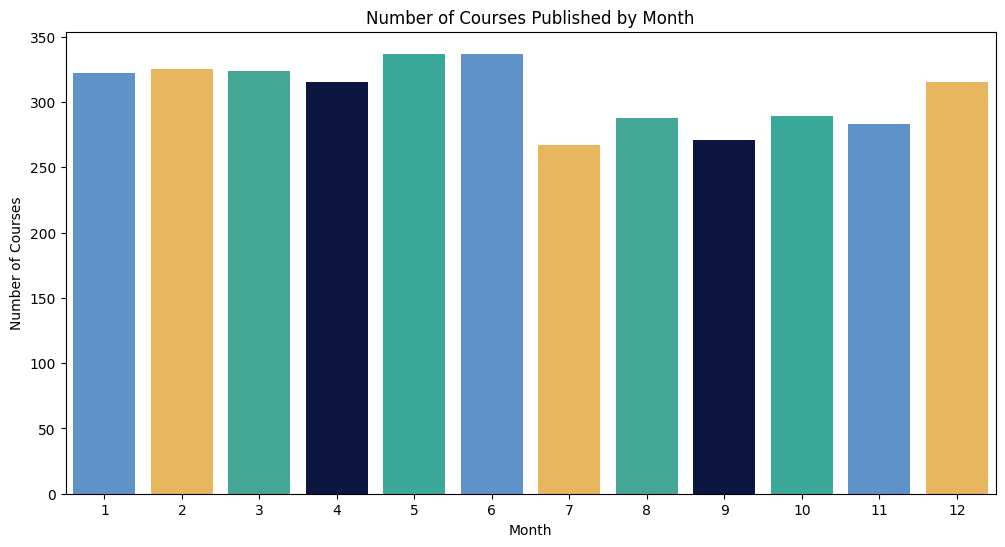

In [ ]:
month_counts = time_data['Month'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette=palette)
plt.title("Number of Courses Published by Month")
plt.xlabel("Month")
plt.ylabel("Number of Courses")
plt.show()


### **Preprocessing**

**Data Format Check**

Date & DateTime

↗ Reformatting Published date

In [ ]:
data["Published Date"].isna().sum()

np.int64(0)

In [ ]:
data["Published Date"] = pd.to_datetime(data["Published Date"], errors="coerce")
data["Published Date"].isna().sum()

np.int64(0)

↗ Getting The duration of our observations

In [ ]:
start_date = data["Published Date"].max()
end_date = data["Published Date"].min()

In [ ]:
from dateutil.relativedelta import relativedelta
duration = relativedelta(start_date, end_date)

print(f"""Dataset Duration : {duration.years} years {duration.months} months {duration.days} days
from {start_date} to {end_date}]""")

Dataset Duration : 6 years 3 months 29 days
from 2017-12-06 00:00:00 to 2011-08-07 00:00:00]


↗ Dropping 'Pulished Timestamp' as it's not needed.

In [ ]:
data = data.drop(columns=["Pulished Timestamp"])
data.head()

,Course Id,Course-Title,Is Paid,Level,Published Date,Subject,URL1,CONTENT DURATION in HR's,Num Lectures,Price,Reviews,Students,Year
0,1070968,Ultimate Investment Banking Course,Paid,All Levels,2017-01-18,Business Finance,https://www.udemy.com/ultimate-investment-bank...,0.045139,51,200,23,2147,2017
1,1113822,Complete GST Course & Certification - Grow You...,Paid,All Levels,2017-09-03,Business Finance,https://www.udemy.com/goods-and-services-tax/,39.000000,274,75,923,2792,2017
2,1006314,Financial Modeling for Business Analysts and C...,Paid,Intermediate Level,2016-12-19,Business Finance,https://www.udemy.com/financial-modeling-for-b...,2.500000,51,45,74,2174,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,Paid,All Levels,2017-05-30,Business Finance,https://www.udemy.com/complete-excel-finance-c...,3.000000,36,95,11,2451,2017
4,1011058,How To Maximize Your Profits Trading Options,Paid,Intermediate Level,2016-12-13,Business Finance,https://www.udemy.com/how-to-maximize-your-pro...,2.000000,26,200,45,1276,2016


↗ Verifying Numerical data types format

In [ ]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_cols)

['Course Id', "CONTENT DURATION in HR's", 'Num Lectures', 'Price', 'Reviews', 'Students']


In [ ]:
for col in num_cols:
  print(f'{col} Check \n')
  print(f'Null values sum. in {col} before: {data[col].isnull().sum()}')
  data[col] = pd.to_numeric(data[col], errors="coerce")
  filld_count = data[col].isnull().sum()
  if filld_count == 0:
    print(f'No Null values After!')
  else:
    print(f'Null values sum. in {col} after: {filld_count}')
    data[col] = data[col].fillna(data[col].mean())
    print(f'Filled {filld_count} missing values in {col} with mean = {data[col].mean()}')
    print('-'*30, '\n')

Course Id Check 

Null values sum. in Course Id before: 0
No Null values After!
CONTENT DURATION in HR's Check 

Null values sum. in CONTENT DURATION in HR's before: 0
No Null values After!
Num Lectures Check 

Null values sum. in Num Lectures before: 0
No Null values After!
Price Check 

Null values sum. in Price before: 0
No Null values After!
Reviews Check 

Null values sum. in Reviews before: 0
No Null values After!
Students Check 

Null values sum. in Students before: 0
No Null values After!


↘ Feature Engineering

In [ ]:
data["Revenue_Estimate"] = data["Price"] * data["Students"]
data["Review_Ratio"] = data["Reviews"] / data["Students"]
data.iloc[0]

,0
Course Id,1070968
Course-Title,Ultimate Investment Banking Course
Is Paid,Paid
Level,All Levels
Published Date,2017-01-18 00:00:00
Subject,Business Finance
URL1,https://www.udemy.com/ultimate-investment-bank...
CONTENT DURATION in HR's,0.045139
Num Lectures,51
Price,200


↘ Exploring / droping duplicates

In [ ]:
data[data.duplicated(subset=["Course-Title"], keep=False)].sort_values("Course-Title")

,Course Id,Course-Title,Is Paid,Level,Published Date,Subject,URL1,CONTENT DURATION in HR's,Num Lectures,Price,Reviews,Students,Year,Revenue_Estimate,Review_Ratio
3549,112314,Acoustic Blues Guitar Lessons,Paid,Intermediate Level,2013-11-28,Musical Instruments,https://www.udemy.com/jim-bruce-blues-guitar-l...,12.500000,40,125,136,1284,2013,160500,0.105919
3544,647276,Acoustic Blues Guitar Lessons,Paid,Intermediate Level,2016-10-01,Musical Instruments,https://www.udemy.com/acoustic-blues-guitar-le...,4.500000,101,75,18,189,2016,14175,0.095238
1208,99324,Acoustic Blues Guitar Lessons,Free,Intermediate Level,2013-09-30,Musical Instruments,https://www.udemy.com/finger-picking-blues-gui...,1.000000,10,0,109,8217,2013,0,0.013265
2944,1152334,Aprende a tocar el acordeÃ³n de botones,Paid,Beginner Level,2017-05-17,Musical Instruments,https://www.udemy.com/aprende-a-tocar-el-acord...,2.000000,24,50,6,20,2017,1000,0.300000
1764,217628,Aprende a tocar el acordeÃ³n de botones,Paid,All Levels,2014-05-19,Musical Instruments,https://www.udemy.com/aprende-a-tocar-el-acord...,3.500000,21,50,4,22,2014,1100,0.181818
462,1084454,CFA Level 2- Quantitative Methods,Paid,All Levels,2017-02-07,Business Finance,https://www.udemy.com/cfa-level-2-quantitative...,5.500000,35,40,0,0,2017,0,NaN
1272,1084454,CFA Level 2- Quantitative Methods,Paid,All Levels,2017-02-07,Business Finance,https://www.udemy.com/cfa-level-2-quantitative...,5.500000,35,40,0,0,2017,0,NaN
3409,699380,Creating an animated greeting card via Google ...,Paid,Intermediate Level,2016-06-05,Graphic Design,https://www.udemy.com/creating-an-animated-gre...,1.000000,8,20,8,770,2016,15400,0.010390
2585,692920,Creating an animated greeting card via Google ...,Paid,Beginner Level,2016-05-01,Graphic Design,https://www.udemy.com/creating-an-animated-gre...,1.500000,9,20,10,1504,2016,30080,0.006649
2548,699376,Creating an animated greeting card via Google ...,Paid,Beginner Level,2016-11-04,Graphic Design,https://www.udemy.com/creating-an-animated-gre...,1.000000,8,20,10,549,2016,10980,0.018215


In [ ]:
data[data.duplicated(keep=False)].sort_values("Course-Title")

,Course Id,Course-Title,Is Paid,Level,Published Date,Subject,URL1,CONTENT DURATION in HR's,Num Lectures,Price,Reviews,Students,Year,Revenue_Estimate,Review_Ratio
462,1084454,CFA Level 2- Quantitative Methods,Paid,All Levels,2017-02-07,Business Finance,https://www.udemy.com/cfa-level-2-quantitative...,5.50,35,40,0,0,2017,0,NaN
1272,1084454,CFA Level 2- Quantitative Methods,Paid,All Levels,2017-02-07,Business Finance,https://www.udemy.com/cfa-level-2-quantitative...,5.50,35,40,0,0,2017,0,NaN
452,837322,Essentials of money value: Get a financial Life !,Paid,All Levels,2016-05-16,Business Finance,https://www.udemy.com/essentials-of-money-value/,1.02,20,20,0,0,2016,0,NaN
786,837322,Essentials of money value: Get a financial Life !,Paid,All Levels,2016-05-16,Business Finance,https://www.udemy.com/essentials-of-money-value/,1.02,20,20,0,0,2016,0,NaN
453,1157298,Introduction to Forex Trading Business For Beg...,Paid,Beginner Level,2017-04-23,Business Finance,https://www.udemy.com/introduction-to-forex-tr...,1.50,27,20,0,0,2017,0,NaN
787,1157298,Introduction to Forex Trading Business For Beg...,Paid,Beginner Level,2017-04-23,Business Finance,https://www.udemy.com/introduction-to-forex-tr...,1.50,27,20,0,0,2017,0,NaN
2188,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,Paid,All Levels,2013-02-01,Web Development,https://www.udemy.com/build-beautiful-html5-we...,4.00,24,75,525,43285,2013,3246375,0.012129
2189,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,Paid,All Levels,2013-02-01,Web Development,https://www.udemy.com/build-beautiful-html5-we...,4.00,24,75,525,43285,2013,3246375,0.012129
2573,185526,MicroStation - CÃ©lulas,Paid,Beginner Level,2014-04-15,Graphic Design,https://www.udemy.com/microstation-celulas/,1.02,9,20,0,0,2014,0,NaN
2574,185526,MicroStation - CÃ©lulas,Paid,Beginner Level,2014-04-15,Graphic Design,https://www.udemy.com/microstation-celulas/,1.02,9,20,0,0,2014,0,NaN


In [ ]:
data = data.drop_duplicates(keep="first")

In [ ]:
data.shape

(3667, 15)

### **Key Questions**

### Pricing
- What is the **average course price**?  
- What is the **cheapest course** and the **most expensive course**?  
- Is there a relationship between **price** and **number of students** or **reviews**?  

---

### Popularity
- What is the distribution of students across different **Subjects**?  
- What is the distribution of students across different **Levels**?  

---

### Course Density
- How many courses were published each **year** / each **month**?  
- Is there a trend of increasing or decreasing number of published courses over the years?  

---

### Revenue
- Estimated revenue per course:  
  \[ Revenue ≈ Price × Students \]  
- Which **Subjects** generate the highest revenues?  
- Which **Levels** generate the highest revenues?  

---

### Content
- What is the relationship between **Content Duration (hours)** and **Number of Lectures**?  
- What percentage of students leave **Reviews** compared to total enrollments?  

---

### Time
- During which **time of the year** do students enroll in courses the most?  

---

### Engagement
- What is the **Review Ratio** (Reviews ÷ Students) across courses?  


### **Extracting the final file**

In [ ]:
data.to_csv("Cleaned_DataSkool.csv", index=False)
data.to_excel("Cleaned_DataSkool.xlsx", index=False)
